#Exploratory Data Analysis on Bestselling Books from Kitapyurdu
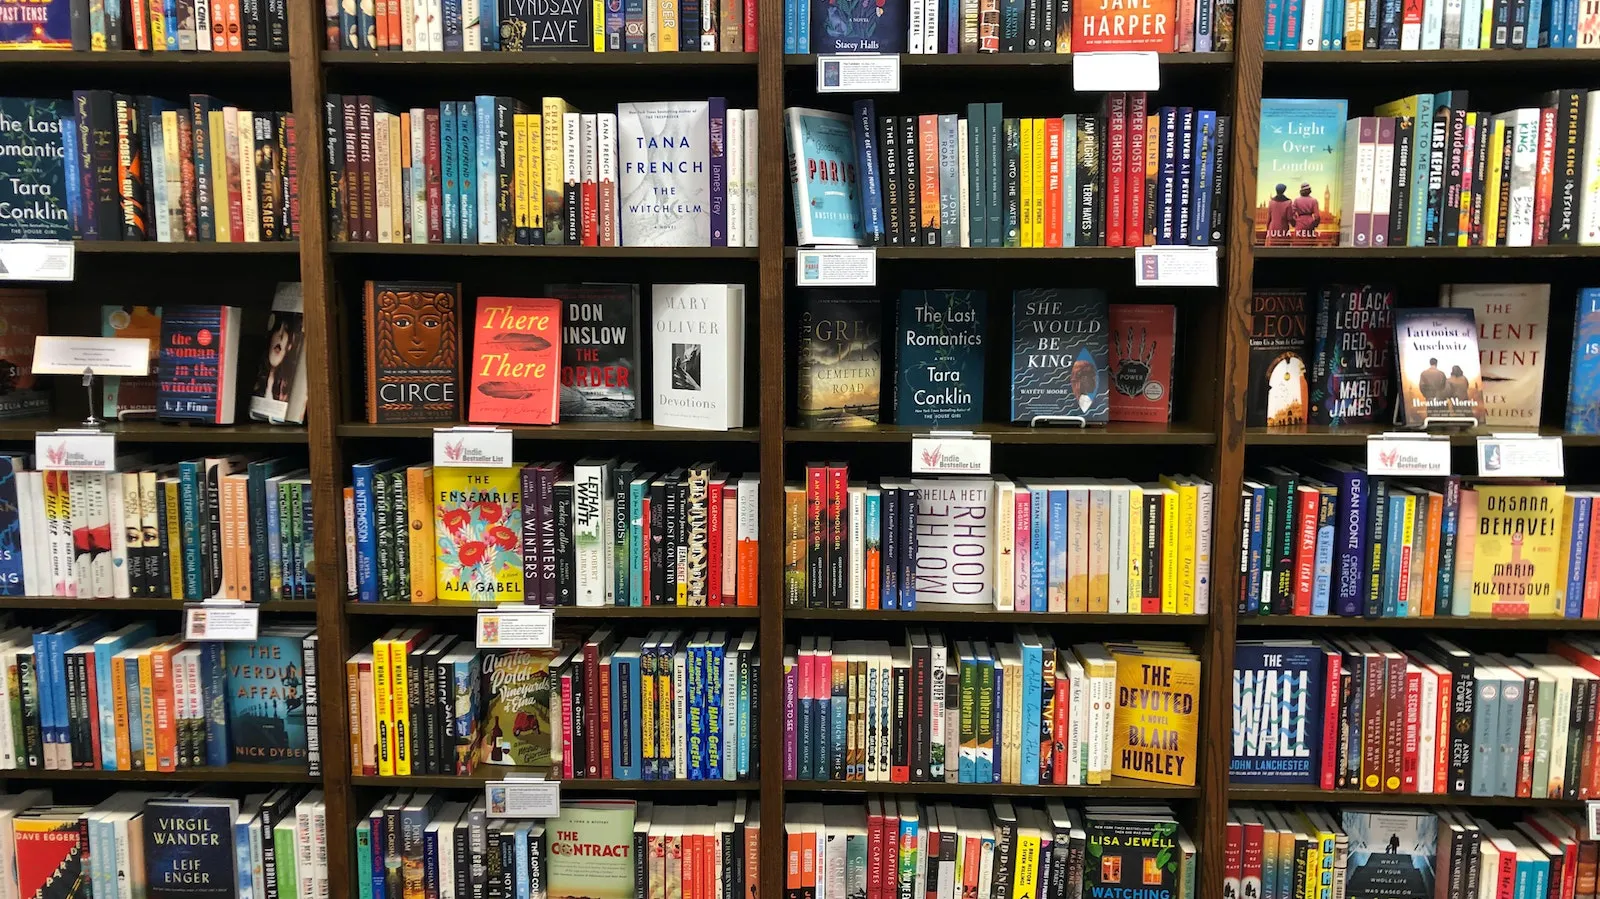

# Content & Features:
##This dataset contains more than 100,000 book information. Scraped from Turkey's one of the most largest online bookstore's web page.



* title - Book Title

*  author - Author Name

*  publisher - Publisher Name

*   page - Number of pages

*   language - Language of books
*  discount_rate - Discount rate
*price - Listing price without discount

*  discounted_price - Currently selling price
*isbn - International Standard Book Number
*date - Publication date
*link - URL to book page
*image - URL to book image

*  reviews - How many people rated the book


*  cover - Type of cover of the book


*  paper - What type of paper is book printed on

####All data in Turkish
####All prices in TRY

##Acknowledgements
##This dataset scraped from https://www.kitapyurdu.com


#Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

#Import dataset

In [2]:
df = pd.read_csv("/content/books.csv")

#Let's take a look at the dataset

In [5]:
df.head()

,title,author,publisher,page,language,discount_rate,discounted_price,price,rating,reviews,cover,paper,isbn,date,link,image
0,Var Mısın? & Güçlü Bir Yaşam İçin Öneriler,Doğan Cüceloğlu,KRONİK KİTAP,320,TÜRKÇE,% 37,31.63,50.0,5,1316,Karton Kapak,2. Hm. Kağıt,9786057635839,2021-01-11,https://www.kitapyurdu.com/kitap/var-misin-amp...,https://img.kitapyurdu.com/v1/getImage/fn:1134...
1,Kayıp Tanrılar Ülkesi,Ahmet Ümit,YAPI KREDİ YAYINLARI,504,TÜRKÇE,% 40,25.14,42.0,5,667,Karton Kapak,Kitap Kağıdı,9789750850417,2021-06-14,https://www.kitapyurdu.com/kitap/kayip-tanrila...,https://img.kitapyurdu.com/v1/getImage/fn:1142...
2,Fareler ve İnsanlar,John Steinbeck,SEL YAYINCILIK,111,TÜRKÇE,% 38,17.46,28.0,5,9380,Karton Kapak,Kitap Kağıdı,9789755705859,2020-05-21,https://www.kitapyurdu.com/kitap/fareler-ve-in...,https://img.kitapyurdu.com/v1/getImage/fn:1122...
3,Simyacı (Ciltsiz),Paulo Coelho,CAN YAYINLARI,184,TÜRKÇE,% 57,19.39,45.0,5,15667,Karton Kapak,Kitap Kağıdı,9789750726439,2021-09-28,https://www.kitapyurdu.com/kitap/simyaci-cilts...,https://img.kitapyurdu.com/v1/getImage/fn:1148...
4,Cesur Yeni Dünya,Aldous Huxley,İTHAKİ YAYINLARI,272,TÜRKÇE,% 65,16.57,48.0,5,6559,Karton Kapak,Kitap Kağıdı,9789756902165,2021-08-20,https://www.kitapyurdu.com/kitap/cesur-yeni-du...,https://img.kitapyurdu.com/v1/getImage/fn:1144...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3457 entries, 0 to 3456
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3457 non-null   object 
 1   author            3457 non-null   object 
 2   publisher         3457 non-null   object 
 3   page              3457 non-null   int64  
 4   language          3457 non-null   object 
 5   discount_rate     3457 non-null   object 
 6   discounted_price  3457 non-null   float64
 7   price             3457 non-null   float64
 8   rating            3457 non-null   int64  
 9   reviews           3457 non-null   int64  
 10  cover             3457 non-null   object 
 11  paper             3457 non-null   object 
 12  isbn              3457 non-null   int64  
 13  date              3457 non-null   object 
 14  link              3456 non-null   object 
 15  image             3456 non-null   object 
dtypes: float64(2), int64(4), object(10)
memory

In [4]:
df.isnull().sum()

title               0
author              0
publisher           0
page                0
language            0
discount_rate       0
discounted_price    0
price               0
rating              0
reviews             0
cover               0
paper               0
isbn                0
date                0
link                1
image               1
dtype: int64

In [6]:
df.shape

(3457, 16)

# Things To Do:
### 1.How are rating rates affected according to reviews?
### 2.Average Price Over the Years
### 3.Best Selling Books in Turkey After Turkish Books
### 4.The difference between the discounted and regular prices of publishers
### 5.Book Page Average of Publishers









#Cleaning The Data

In [17]:
df.head()

,title,author,publisher,page,language,discount_rate,discounted_price,price,rating,reviews,cover,paper,isbn,date,link,image
0,Var Mısın? & Güçlü Bir Yaşam İçin Öneriler,Doğan Cüceloğlu,KRONİK KİTAP,320,TÜRKÇE,% 37,31.63,50.0,5,1316,Karton Kapak,2. Hm. Kağıt,9786057635839,2021-01-11,https://www.kitapyurdu.com/kitap/var-misin-amp...,https://img.kitapyurdu.com/v1/getImage/fn:1134...
1,Kayıp Tanrılar Ülkesi,Ahmet Ümit,YAPI KREDİ YAYINLARI,504,TÜRKÇE,% 40,25.14,42.0,5,667,Karton Kapak,Kitap Kağıdı,9789750850417,2021-06-14,https://www.kitapyurdu.com/kitap/kayip-tanrila...,https://img.kitapyurdu.com/v1/getImage/fn:1142...
2,Fareler ve İnsanlar,John Steinbeck,SEL YAYINCILIK,111,TÜRKÇE,% 38,17.46,28.0,5,9380,Karton Kapak,Kitap Kağıdı,9789755705859,2020-05-21,https://www.kitapyurdu.com/kitap/fareler-ve-in...,https://img.kitapyurdu.com/v1/getImage/fn:1122...
3,Simyacı (Ciltsiz),Paulo Coelho,CAN YAYINLARI,184,TÜRKÇE,% 57,19.39,45.0,5,15667,Karton Kapak,Kitap Kağıdı,9789750726439,2021-09-28,https://www.kitapyurdu.com/kitap/simyaci-cilts...,https://img.kitapyurdu.com/v1/getImage/fn:1148...
4,Cesur Yeni Dünya,Aldous Huxley,İTHAKİ YAYINLARI,272,TÜRKÇE,% 65,16.57,48.0,5,6559,Karton Kapak,Kitap Kağıdı,9789756902165,2021-08-20,https://www.kitapyurdu.com/kitap/cesur-yeni-du...,https://img.kitapyurdu.com/v1/getImage/fn:1144...


In [18]:
df.dropna(axis=0, how="any",thresh=None, inplace=True)

In [19]:
df.isnull().sum()

title               0
author              0
publisher           0
page                0
language            0
discount_rate       0
discounted_price    0
price               0
rating              0
reviews             0
cover               0
paper               0
isbn                0
date                0
link                0
image               0
dtype: int64

In [20]:
df.drop(["link","image","isbn"],axis=1,inplace=True)

In [21]:
df.replace("unknown",np.nan,inplace=True)

In [22]:
df.sample(3)

,title,author,publisher,page,language,discount_rate,discounted_price,price,rating,reviews,cover,paper,date
2944,Eski Yunan ve Roma Tarihine Giriş,Prof. Dr. Oğuz Tekin,İLETİŞİM YAYINLARI,349,TÜRKÇE,% 27,51.24,70.0,5,206,Karton Kapak,Kitap Kağıdı,2021-06-02
1876,Doğmuş Olmanın Sakıncası Üstüne,Emil Michel Cioran,METİS YAYINLARI,200,TÜRKÇE,% 27,26.35,36.0,4,101,Karton Kapak,Kitap Kağıdı,2020-09-21
2042,Tepeden Tırnağa,Eric Carle,KURALDIŞI YAYINLARI,32,TÜRKÇE,% 36,27.43,43.0,5,163,Karton Kapak,Kitap Kağıdı,2018-12-27


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3455
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3456 non-null   object 
 1   author            3431 non-null   object 
 2   publisher         3456 non-null   object 
 3   page              3456 non-null   int64  
 4   language          3456 non-null   object 
 5   discount_rate     3456 non-null   object 
 6   discounted_price  3456 non-null   float64
 7   price             3456 non-null   float64
 8   rating            3456 non-null   int64  
 9   reviews           3456 non-null   int64  
 10  cover             3456 non-null   object 
 11  paper             3456 non-null   object 
 12  date              3447 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 378.0+ KB


In [24]:
df["year"] = pd.to_datetime(df["date"])
df = df.set_index("year")

In [25]:
df["years"] = df.index.strftime('%Y')


In [26]:
df.reset_index(drop=True,inplace=True)

In [27]:
df.head()

,title,author,publisher,page,language,discount_rate,discounted_price,price,rating,reviews,cover,paper,date,years
0,Var Mısın? & Güçlü Bir Yaşam İçin Öneriler,Doğan Cüceloğlu,KRONİK KİTAP,320,TÜRKÇE,% 37,31.63,50.0,5,1316,Karton Kapak,2. Hm. Kağıt,2021-01-11,2021
1,Kayıp Tanrılar Ülkesi,Ahmet Ümit,YAPI KREDİ YAYINLARI,504,TÜRKÇE,% 40,25.14,42.0,5,667,Karton Kapak,Kitap Kağıdı,2021-06-14,2021
2,Fareler ve İnsanlar,John Steinbeck,SEL YAYINCILIK,111,TÜRKÇE,% 38,17.46,28.0,5,9380,Karton Kapak,Kitap Kağıdı,2020-05-21,2020
3,Simyacı (Ciltsiz),Paulo Coelho,CAN YAYINLARI,184,TÜRKÇE,% 57,19.39,45.0,5,15667,Karton Kapak,Kitap Kağıdı,2021-09-28,2021
4,Cesur Yeni Dünya,Aldous Huxley,İTHAKİ YAYINLARI,272,TÜRKÇE,% 65,16.57,48.0,5,6559,Karton Kapak,Kitap Kağıdı,2021-08-20,2021


#1. How are rating rates affected according to reviews?

In [251]:
df.groupby("rating")[["reviews"]].sum().astype("int").T

rating,0,2,3,4,5
reviews,0,931,2144,191258,969992


In [235]:
a=df.groupby("rating")["reviews"].sum().astype("str").index
a

Int64Index([0, 2, 3, 4, 5], dtype='int64', name='rating')

In [236]:
b = df.groupby("rating")["reviews"].sum().astype("str").values
b

array(['0', '931', '2144', '191258', '969992'], dtype=object)

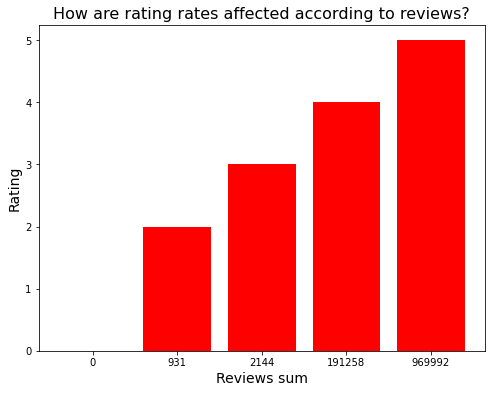

In [246]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(b,a,color="r")
ax.set_xlabel('Reviews sum',size=14,)
ax.set_ylabel('Rating',size=14)
ax.set_title('How are rating rates affected according to reviews?',size=16);

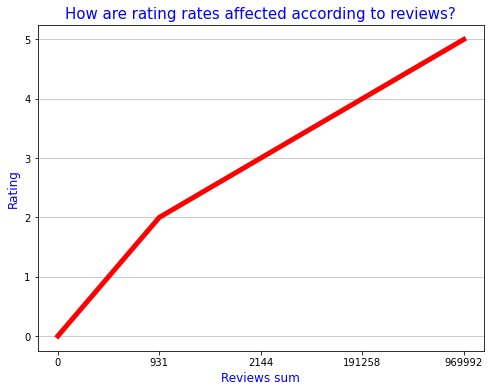

In [241]:
plt.figure(figsize=(8,6))
plt.plot(b,a,"r",linewidth=5)
plt.grid(axis="y",which="both",color="k",alpha=0.25)
plt.xlabel("Reviews sum",size=12,color="b")
plt.ylabel("Rating",size=12,color="b")
plt.title("How are rating rates affected according to reviews?",size=15,color="b");

In [250]:
print("The higher the number of reviews, the higher your rating.")

The higher the number of reviews, the higher your rating.


#2.Average Price Over the Years

In [248]:
df.groupby("years")[["price"]].mean().astype("int").mean()
# Average price of books over the years

price    55.842105
dtype: float64

In [249]:
a= df.groupby("years")[["price"]].mean().astype("int").mean().astype("int")[0]
print(f"Average price of books by years in Turkey is {a} turkish liras")

Average price of books by years in Turkey is 55 turkish liras


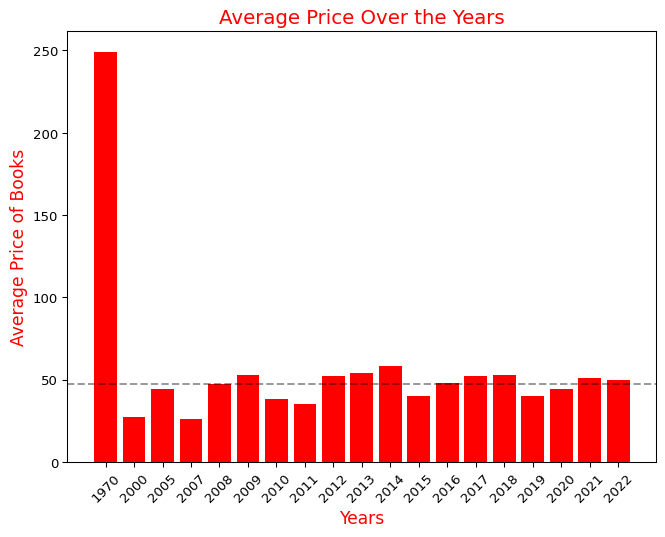

In [247]:
k=df.groupby("years")["price"].mean().astype("int").index
j=df.groupby("years")["price"].mean().astype("int").values
fig, ax = plt.subplots(figsize=(8,6),dpi=95)
ax.bar(k,j,color="r")
ax.tick_params(axis='x',labelrotation = 45,labelcolor="k")
ax.set_xlabel("Years",size=13,color="r")
ax.set_ylabel("Average Price of Books",size=13,color="r")
ax.set_title("Average Price Over the Years",color="r",size=15)
ax.axhline(y=47.3, ls="--",alpha=0.4,color="k"); 
# Although it varies according to the years, the average price of a book in Turkey is between 50 and 40 TL.

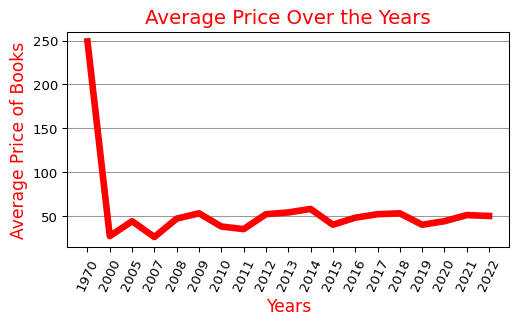

In [203]:
fig, ax = plt.subplots(figsize=(6, 3),dpi=95)

ax.plot(k, j, 'r',linewidth=5)
ax.set_xlabel("Years",size=13,color="r")
ax.set_ylabel("Average Price of Books",size=13,color="r")
ax.set_title("Average Price Over the Years",color="r",size=15)
ax.tick_params(axis='x',labelrotation = 65)

plt.grid(axis="y",which="both",color="k",alpha=0.4)
plt.show()
# The average price of the books published since 2004 is 40-50 TL.

#3.Best Selling Books in Turkey After Turkish Books


In [41]:
pd.DataFrame(df.language.value_counts()).T

,TÜRKÇE,İNGİLİZCE,ARAPÇA-TÜRKÇE,İNGİLİZCE-TÜRKÇE,OSMANLICA-TÜRKÇE,OSMANLICA,ARAPÇA,ALMANCA-TÜRKÇE,ALMANCA
language,3422,19,5,4,2,1,1,1,1


In [42]:
ds_f=pd.DataFrame(df.language.value_counts())[1::].T
ds_f 

,İNGİLİZCE,ARAPÇA-TÜRKÇE,İNGİLİZCE-TÜRKÇE,OSMANLICA-TÜRKÇE,OSMANLICA,ARAPÇA,ALMANCA-TÜRKÇE,ALMANCA
language,19,5,4,2,1,1,1,1


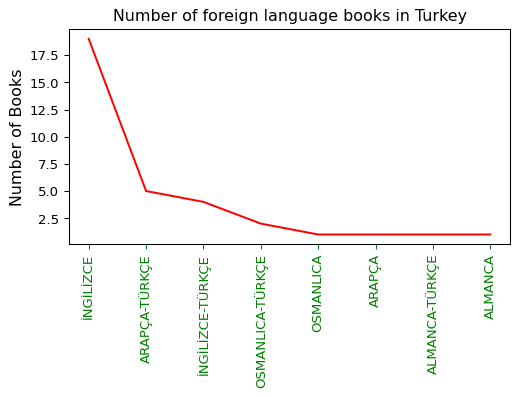

In [43]:
res =df.language.value_counts()[1::].index
t =df.language.value_counts()[1::].values

fig, ax = plt.subplots(figsize=(6, 3),dpi=95)

ax.plot(res, t, 'r')
ax.set_ylabel("Number of Books",size=12)
ax.set_title("Number of foreign language books in Turkey")
ax.tick_params(axis='x',labelrotation =90,colors="green");

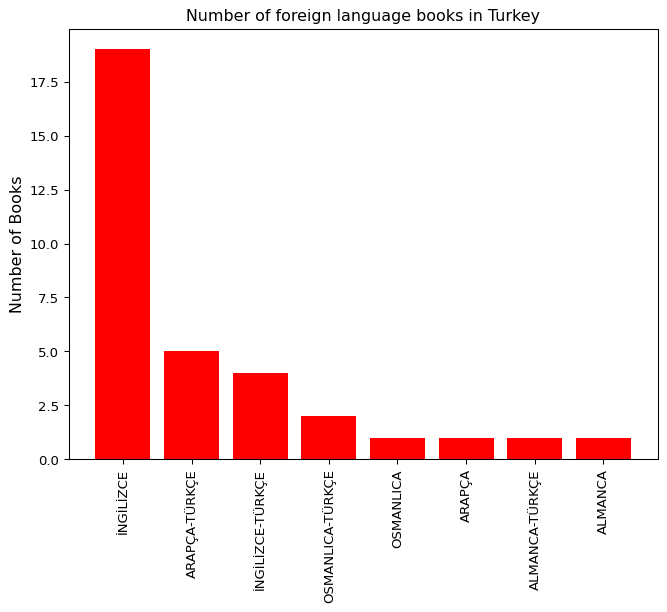

In [207]:
fig, ax = plt.subplots(figsize=(8,6),dpi=95)
ax.bar(res,t,color="r")
plt.xticks(rotation=90)
ax.set_ylabel("Number of Books",size=12)
ax.set_title("Number of foreign language books in Turkey");
#The language of the best-selling books in Turkey after Turkish books is English. 

In [45]:
max_E=ds_f.max()[0]
max_T=df.language.value_counts()[0]
print(f"Number of Turkish books is {max_T} and number of English books is {max_E}. ")
print("The language of the best-selling books in Turkey after Turkish books is English.")


Number of Turkish books is 3422 and number of English books is 19. 
The language of the best-selling books in Turkey after Turkish books is English.


#4.The difference between the discounted and regular prices of publishers

In [47]:
df.groupby("publisher")[["price"]].mean().astype("int").T

publisher,ACAYİP KİTAPLAR,ADRES YAYINLARI,AGANTA KİTAP,AGORA KİTAPLIĞI,AHBAP KİTAP,AKAŞA YAYINLARI,AKDEM YAYINLARI,AKILÇELEN KİTAPLAR,ALBARAKA YAYINLARI,ALFA YAYINLARI,ALKIM YAYINEVİ,ALTIN KİTAPLAR,ALTIN KİTAPLAR AKADEMİ,ALTINORDU YAYINLARI,ANKARA OKULU YAYINLARI,ANTRENMAN YAYINLARI,ARITAN YAYINEVİ,ARKADAŞ YAYINLARI,ARTEMİS YAYINLARI,ATAYURT YAYINEVİ,AYDIN KİTABEVİ-ANKARA,AYLAK KİTAP,AYRINTI YAYINLARI,AÇILIM KİTAP,AŞİNA,BABIALİ KÜLTÜR YAYINCILIĞI,BALIK KİTAP,BARIŞ İLHAN YAYINEVİ,BEKA YAYINLARI,BENİM HOCAM YAYINLARI,BETA BASIM YAYIM,BETA KIDS,BETA KİTAP,BEYAN YAYINLARI,BEYAN ÇOCUK,BEYAZ BALİNA YAYINLARI,BEYAZ BULUT,BEYAZ YAYINLARI,BOĞAZİÇİ YAYINLARI,BUDALA KİTAP,...,YEDİTEPE YAYINEVİ,YEDİVEREN YAYINLARI,YEDİİKLİM YAYINLARI,YENİ BOYUT,YENİ İNSAN YAYINEVİ,YÜZ KİTAP,YÜZLEŞME YAYINLARI,YİTİK ŞİFA,ÇAMLICA ÇOCUK YAYINLARI,ÇAĞDAŞ KİTAP,ÇELİK YAYINEVİ,ÇINAR YAYINLARI,ÇIRA YAYINLARI,ÖTESİ YAYINCILIK,ÖTÜKEN NEŞRİYAT,ÖZGÜR YAYINLARI,ÜÇ DÖRT BEŞ YAYINCILIK,İDRAK YAYINLARI,İLERİ KİTAPLIĞI,İLETİŞİM YAYINLARI,İLKSATIR YAYINEVİ,İMGE KİTABEVİ YAYINLARI,İNDİE KİTAP,İNDİGO KİTAP,İNKA KİTAP,İNKILAP KİTABEVİ,İNSAN SANAT,İNSAN YAYINLARI,İSAM / İSLAM ARAŞTIRMALARI MERKEZİ,İSEM YAYINCILIK,İSKELE YAYINCILIK,İSTANBUL FETİH CEMİYETİ YAYINLARI,İSTANBUL YAYINEVİ,İTHAKİ YAYINLARI,İZ YAYINCILIK,İŞARET YAYINLARI,ŞAMİL YAYINLARI İSTANBUL,ŞENOL HOCA YAYINLARI,ŞULE YAYINLARI,ŞİRA YAYINLARI
price,41,120,51,63,25,70,100,28,42,40,10,48,38,189,64,126,43,45,44,98,275,39,65,35,35,41,15,75,45,89,176,106,28,47,22,43,35,49,57,40,...,53,42,43,75,49,30,38,57,54,28,41,29,25,23,29,93,129,35,60,52,64,176,34,34,39,39,26,41,63,70,30,25,45,61,43,71,180,59,40,144


In [48]:
df.groupby("publisher")[["discounted_price"]].mean().astype("int").T

publisher,ACAYİP KİTAPLAR,ADRES YAYINLARI,AGANTA KİTAP,AGORA KİTAPLIĞI,AHBAP KİTAP,AKAŞA YAYINLARI,AKDEM YAYINLARI,AKILÇELEN KİTAPLAR,ALBARAKA YAYINLARI,ALFA YAYINLARI,ALKIM YAYINEVİ,ALTIN KİTAPLAR,ALTIN KİTAPLAR AKADEMİ,ALTINORDU YAYINLARI,ANKARA OKULU YAYINLARI,ANTRENMAN YAYINLARI,ARITAN YAYINEVİ,ARKADAŞ YAYINLARI,ARTEMİS YAYINLARI,ATAYURT YAYINEVİ,AYDIN KİTABEVİ-ANKARA,AYLAK KİTAP,AYRINTI YAYINLARI,AÇILIM KİTAP,AŞİNA,BABIALİ KÜLTÜR YAYINCILIĞI,BALIK KİTAP,BARIŞ İLHAN YAYINEVİ,BEKA YAYINLARI,BENİM HOCAM YAYINLARI,BETA BASIM YAYIM,BETA KIDS,BETA KİTAP,BEYAN YAYINLARI,BEYAN ÇOCUK,BEYAZ BALİNA YAYINLARI,BEYAZ BULUT,BEYAZ YAYINLARI,BOĞAZİÇİ YAYINLARI,BUDALA KİTAP,...,YEDİTEPE YAYINEVİ,YEDİVEREN YAYINLARI,YEDİİKLİM YAYINLARI,YENİ BOYUT,YENİ İNSAN YAYINEVİ,YÜZ KİTAP,YÜZLEŞME YAYINLARI,YİTİK ŞİFA,ÇAMLICA ÇOCUK YAYINLARI,ÇAĞDAŞ KİTAP,ÇELİK YAYINEVİ,ÇINAR YAYINLARI,ÇIRA YAYINLARI,ÖTESİ YAYINCILIK,ÖTÜKEN NEŞRİYAT,ÖZGÜR YAYINLARI,ÜÇ DÖRT BEŞ YAYINCILIK,İDRAK YAYINLARI,İLERİ KİTAPLIĞI,İLETİŞİM YAYINLARI,İLKSATIR YAYINEVİ,İMGE KİTABEVİ YAYINLARI,İNDİE KİTAP,İNDİGO KİTAP,İNKA KİTAP,İNKILAP KİTABEVİ,İNSAN SANAT,İNSAN YAYINLARI,İSAM / İSLAM ARAŞTIRMALARI MERKEZİ,İSEM YAYINCILIK,İSKELE YAYINCILIK,İSTANBUL FETİH CEMİYETİ YAYINLARI,İSTANBUL YAYINEVİ,İTHAKİ YAYINLARI,İZ YAYINCILIK,İŞARET YAYINLARI,ŞAMİL YAYINLARI İSTANBUL,ŞENOL HOCA YAYINLARI,ŞULE YAYINLARI,ŞİRA YAYINLARI
discounted_price,24,82,35,45,16,52,70,18,29,28,4,32,28,124,40,76,30,30,30,73,221,27,45,23,26,24,10,57,27,51,149,71,21,32,14,31,25,36,45,24,...,35,25,24,58,32,21,25,40,33,12,22,19,17,16,29,70,91,24,43,37,45,142,22,23,28,28,17,28,48,41,13,21,30,35,29,54,113,46,24,95


In [49]:
dis_p=df.discounted_price
pri_f=df.price

In [50]:
df["Difference"]=pd.DataFrame(pri_f - dis_p)

In [51]:
df.head(5)

,title,author,publisher,page,language,discount_rate,discounted_price,price,rating,reviews,cover,paper,date,years,Difference
0,Var Mısın? & Güçlü Bir Yaşam İçin Öneriler,Doğan Cüceloğlu,KRONİK KİTAP,320,TÜRKÇE,% 37,31.63,50.0,5,1316,Karton Kapak,2. Hm. Kağıt,2021-01-11,2021,18.37
1,Kayıp Tanrılar Ülkesi,Ahmet Ümit,YAPI KREDİ YAYINLARI,504,TÜRKÇE,% 40,25.14,42.0,5,667,Karton Kapak,Kitap Kağıdı,2021-06-14,2021,16.86
2,Fareler ve İnsanlar,John Steinbeck,SEL YAYINCILIK,111,TÜRKÇE,% 38,17.46,28.0,5,9380,Karton Kapak,Kitap Kağıdı,2020-05-21,2020,10.54
3,Simyacı (Ciltsiz),Paulo Coelho,CAN YAYINLARI,184,TÜRKÇE,% 57,19.39,45.0,5,15667,Karton Kapak,Kitap Kağıdı,2021-09-28,2021,25.61
4,Cesur Yeni Dünya,Aldous Huxley,İTHAKİ YAYINLARI,272,TÜRKÇE,% 65,16.57,48.0,5,6559,Karton Kapak,Kitap Kağıdı,2021-08-20,2021,31.43


In [57]:
df.groupby("publisher").mean()[["Difference"]].astype("int").T

publisher,ACAYİP KİTAPLAR,ADRES YAYINLARI,AGANTA KİTAP,AGORA KİTAPLIĞI,AHBAP KİTAP,AKAŞA YAYINLARI,AKDEM YAYINLARI,AKILÇELEN KİTAPLAR,ALBARAKA YAYINLARI,ALFA YAYINLARI,ALKIM YAYINEVİ,ALTIN KİTAPLAR,ALTIN KİTAPLAR AKADEMİ,ALTINORDU YAYINLARI,ANKARA OKULU YAYINLARI,ANTRENMAN YAYINLARI,ARITAN YAYINEVİ,ARKADAŞ YAYINLARI,ARTEMİS YAYINLARI,ATAYURT YAYINEVİ,AYDIN KİTABEVİ-ANKARA,AYLAK KİTAP,AYRINTI YAYINLARI,AÇILIM KİTAP,AŞİNA,BABIALİ KÜLTÜR YAYINCILIĞI,BALIK KİTAP,BARIŞ İLHAN YAYINEVİ,BEKA YAYINLARI,BENİM HOCAM YAYINLARI,BETA BASIM YAYIM,BETA KIDS,BETA KİTAP,BEYAN YAYINLARI,BEYAN ÇOCUK,BEYAZ BALİNA YAYINLARI,BEYAZ BULUT,BEYAZ YAYINLARI,BOĞAZİÇİ YAYINLARI,BUDALA KİTAP,...,YEDİTEPE YAYINEVİ,YEDİVEREN YAYINLARI,YEDİİKLİM YAYINLARI,YENİ BOYUT,YENİ İNSAN YAYINEVİ,YÜZ KİTAP,YÜZLEŞME YAYINLARI,YİTİK ŞİFA,ÇAMLICA ÇOCUK YAYINLARI,ÇAĞDAŞ KİTAP,ÇELİK YAYINEVİ,ÇINAR YAYINLARI,ÇIRA YAYINLARI,ÖTESİ YAYINCILIK,ÖTÜKEN NEŞRİYAT,ÖZGÜR YAYINLARI,ÜÇ DÖRT BEŞ YAYINCILIK,İDRAK YAYINLARI,İLERİ KİTAPLIĞI,İLETİŞİM YAYINLARI,İLKSATIR YAYINEVİ,İMGE KİTABEVİ YAYINLARI,İNDİE KİTAP,İNDİGO KİTAP,İNKA KİTAP,İNKILAP KİTABEVİ,İNSAN SANAT,İNSAN YAYINLARI,İSAM / İSLAM ARAŞTIRMALARI MERKEZİ,İSEM YAYINCILIK,İSKELE YAYINCILIK,İSTANBUL FETİH CEMİYETİ YAYINLARI,İSTANBUL YAYINEVİ,İTHAKİ YAYINLARI,İZ YAYINCILIK,İŞARET YAYINLARI,ŞAMİL YAYINLARI İSTANBUL,ŞENOL HOCA YAYINLARI,ŞULE YAYINLARI,ŞİRA YAYINLARI
Difference,16,37,16,17,8,17,29,9,12,12,5,16,9,64,23,49,12,14,13,24,53,12,19,12,8,16,5,18,17,38,27,35,7,14,7,11,9,13,11,16,...,18,16,18,16,16,9,12,16,20,15,18,9,7,6,0,22,37,10,16,14,19,34,11,10,10,10,8,13,14,29,17,4,14,25,14,17,66,12,15,48


In [53]:
dif=df.groupby("publisher").mean()[["Difference"]].astype("int")

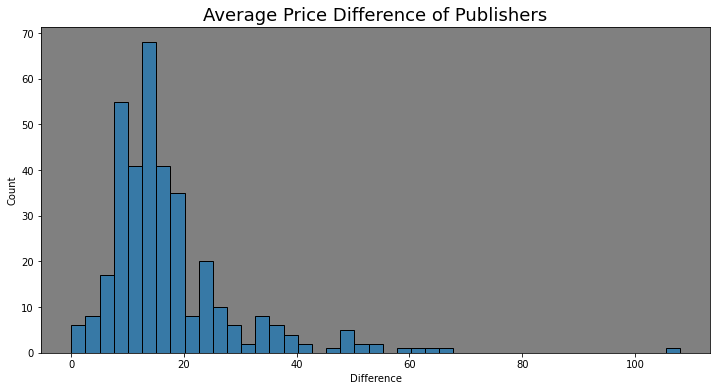

In [201]:
plt.figure(figsize=(12,6))
ax=sns.histplot(data=dif, x="Difference")
ax.set_title("Average Price Difference of Publishers",color="k",size=18)
ax.patch.set_facecolor('grey');
# average price difference of publishers

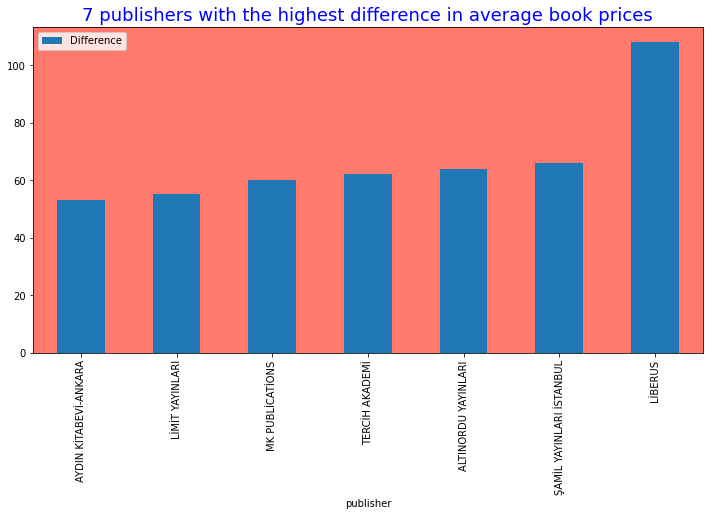

In [197]:
ax=dif.sort_values(by="Difference").tail(7).plot(kind="bar",figsize=(12,6))
ax.set_facecolor(("xkcd:salmon"))
ax.set_title("7 publishers with the highest difference in average book prices",color="b",size=18);
# 7 publishers with the highest difference in average book prices

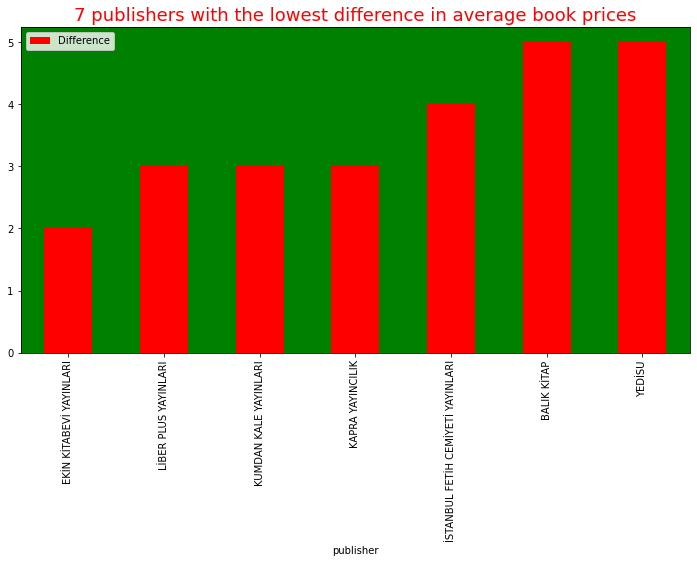

In [187]:
ax=dif[dif.Difference>0].sort_values(by="Difference").head(7).plot(kind="bar",figsize=(12,6),color="r")
ax.set_facecolor(("g"))
ax.set_title("7 publishers with the lowest difference in average book prices",color="r",size=18);
# 7 publishers with the lowest difference in average book prices

 # 5.Book Page Average of Publishers

In [87]:
pub_pag = df.groupby("publisher").mean()[["page"]].astype("int")
pub_pag

,page
publisher,
ACAYİP KİTAPLAR,204
ADRES YAYINLARI,536
AGANTA KİTAP,233
AGORA KİTAPLIĞI,375
AHBAP KİTAP,176
...,...
İŞARET YAYINLARI,324
ŞAMİL YAYINLARI İSTANBUL,736
ŞENOL HOCA YAYINLARI,308


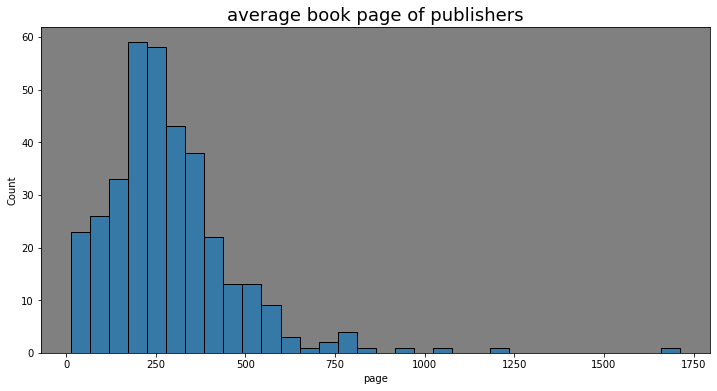

In [171]:
plt.figure(figsize=(12,6))
ax= sns.histplot(data=pub_pag, x="page")
ax.set_title("average book page of publishers",color="k",size=18)
ax.patch.set_facecolor('grey');
# average book page distribution of publishers

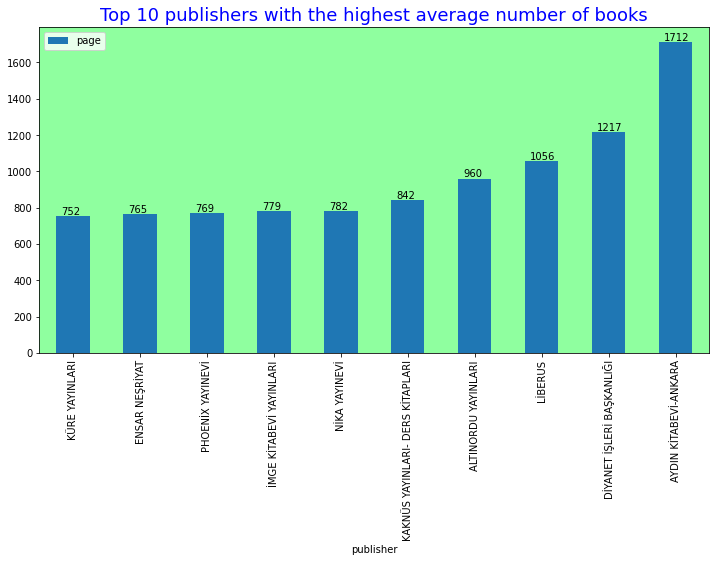

In [233]:
ax= pub_pag.sort_values(by="page").tail(10).plot(kind="bar",figsize=(12,6))
ax.set_facecolor(("xkcd:mint green"))
ax.set_title("Top 10 publishers with the highest average number of books",color="b",size=18)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+10));
# Top 10 publishers with the highest average number of books

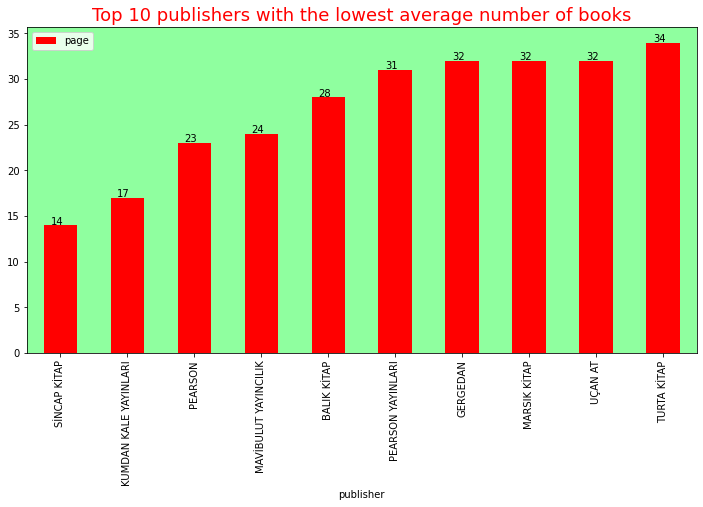

In [155]:
ax= pub_pag.sort_values(by="page").head(10).plot(kind="bar",figsize=(12,6),color="r")
ax.set_title("Top 10 publishers with the lowest average number of books",color="r",size=18)
ax.set_facecolor(("xkcd:mint green"))
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+0.08),);
# Top 10 publishers with the lowest average number of books